<a href="https://colab.research.google.com/github/Alex-cyber-svg/ml-dl_special/blob/main/Data%20Mining/(Data_Mining)_%D0%A0%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%9611_%D0%9F%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85_%D1%80%D1%8F%D0%B4%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Работа №11. Прогнозирование временных рядов**

Датасет - NVIDIA Stock Data 2024

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!curl -L -o /content/nvidia-stock-data-2024.zip\
  https://www.kaggle.com/api/v1/datasets/download/umerhaddii/nvidia-stock-data-2024
!unzip -qq nvidia-stock-data-2024.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  207k  100  207k    0     0   311k      0 --:--:-- --:--:-- --:--:-- 98.7M


In [ ]:
data = pd.read_csv("NVDA_1999-01-01_2024-12-04.csv", index_col = 'Date', parse_dates = True)
data = data['2020-01-02':]
data = data['Close']
data.head()

,Close
Date,
2020-01-02,5.99775
2020-01-03,5.90175
2020-01-06,5.92650
2020-01-07,5.99825
2020-01-08,6.00950


In [ ]:
data.shape

(1239,)

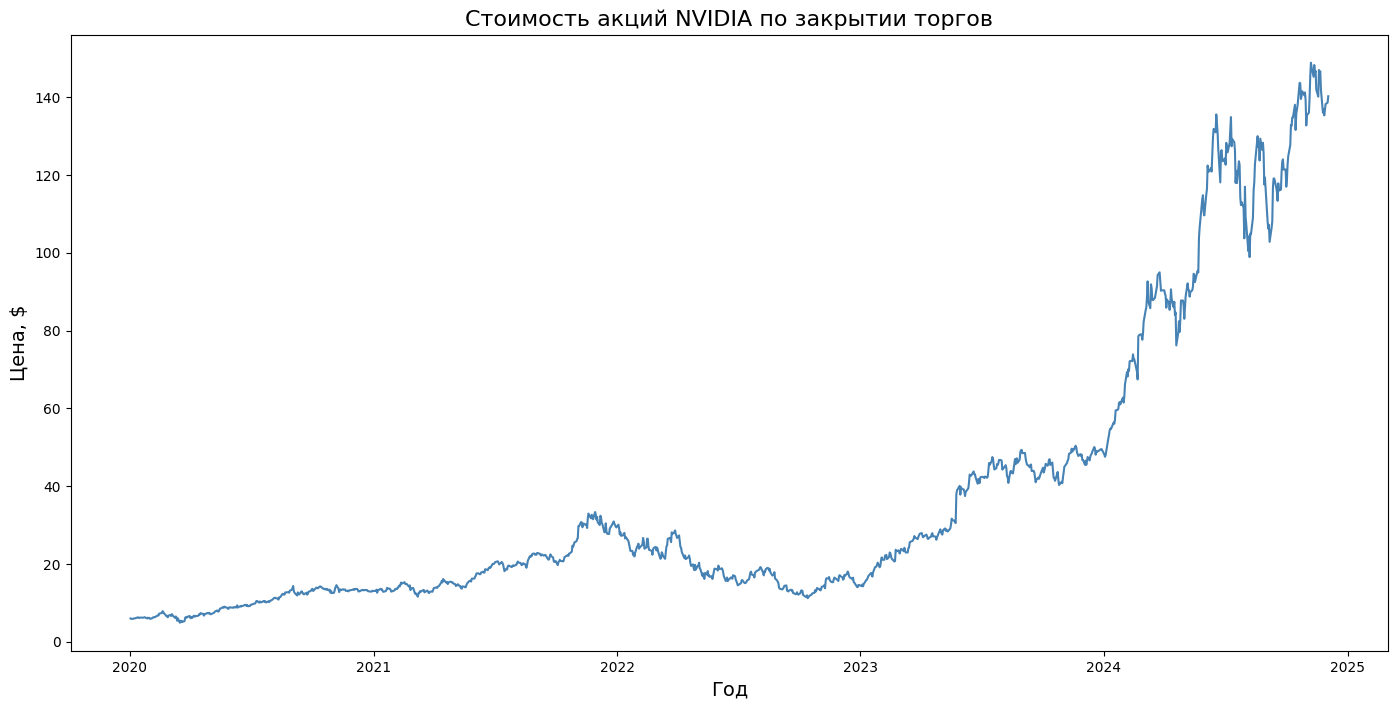

In [ ]:
plt.figure(figsize = (17,8))

plt.plot(data, color = 'steelblue')
plt.xlabel('Год', fontsize = 14)
plt.ylabel('Цена, $', fontsize = 14)
plt.title('Стоимость акций NVIDIA по закрытии торгов', fontsize = 16)

plt.show()

## Машинное обучение - SARIMAX

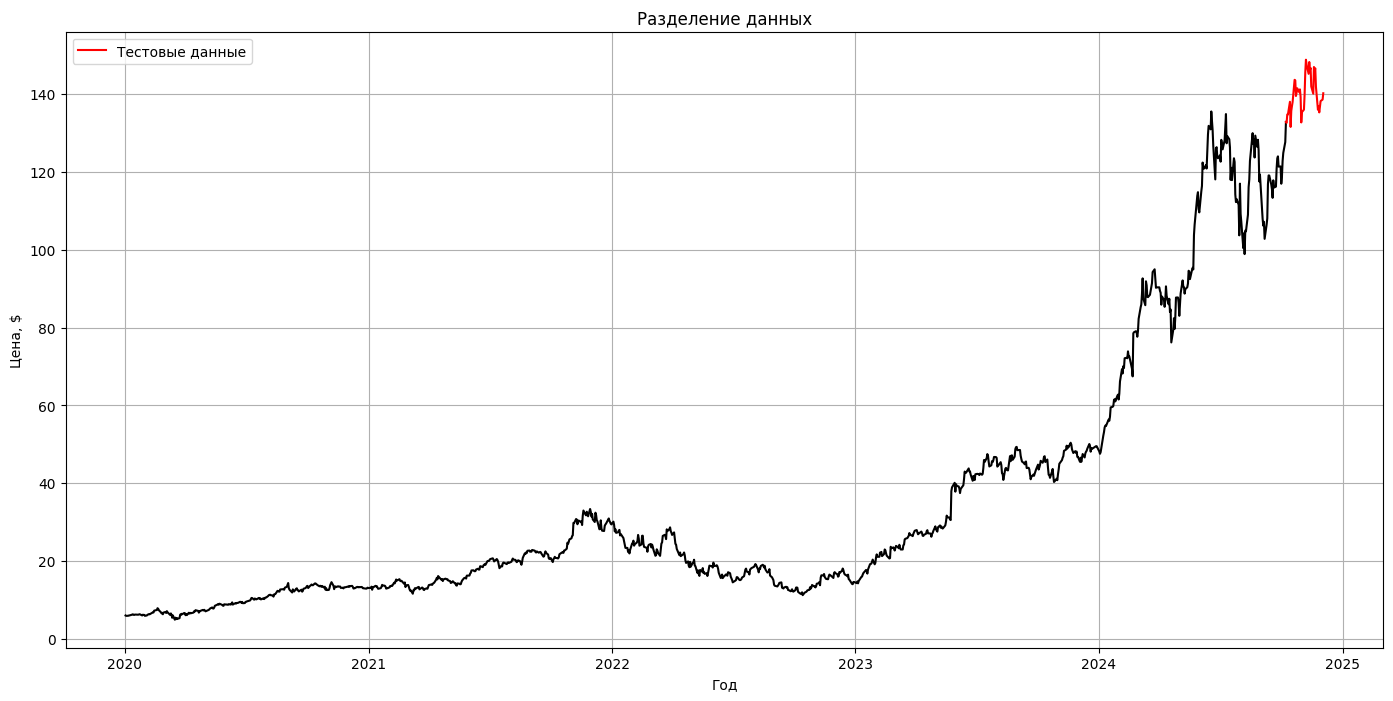

In [ ]:
train = data[:'2024-10-08']
test = data['2024-10-08':]

plt.figure(figsize = (17,8))
plt.plot(train, color = "black")
plt.plot(test, color = "red", label='Тестовые данные')

plt.title('Разделение данных')
plt.ylabel('Цена, $')
plt.xlabel('Год')
plt.legend()
plt.grid()

plt.show()

In [ ]:
!pip install pmdarima
!pip install statsmodels

In [ ]:
# импортируем функцию для автоматического подбора параметров модели ARIMA
from pmdarima import auto_arima


# "погасим" предупреждения
import warnings
warnings.filterwarnings("ignore")

# настроим поиск параметров на обучающей выборке
parameter_search = auto_arima(train, start_p = 1, start_q = 1, max_p = 3, max_q = 3, m = 17, start_P = 0, seasonal = True,  # при m = 20 вылетает
                         d = None, D = 1, trace = True, error_action ='ignore', suppress_warnings = True,  stepwise = True)

# выведем результат
print(parameter_search.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[17]             : AIC=inf, Time=10.24 sec
 ARIMA(0,1,0)(0,1,0)[17]             : AIC=5242.360, Time=0.14 sec
 ARIMA(1,1,0)(1,1,0)[17]             : AIC=4979.064, Time=0.77 sec
 ARIMA(0,1,1)(0,1,1)[17]             : AIC=inf, Time=3.57 sec
 ARIMA(1,1,0)(0,1,0)[17]             : AIC=5234.595, Time=0.17 sec
 ARIMA(1,1,0)(2,1,0)[17]             : AIC=4764.990, Time=2.35 sec
 ARIMA(1,1,0)(2,1,1)[17]             : AIC=inf, Time=13.12 sec
 ARIMA(1,1,0)(1,1,1)[17]             : AIC=inf, Time=6.36 sec
 ARIMA(0,1,0)(2,1,0)[17]             : AIC=4775.871, Time=1.42 sec
 ARIMA(2,1,0)(2,1,0)[17]             : AIC=4763.719, Time=2.48 sec
 ARIMA(2,1,0)(1,1,0)[17]             : AIC=4975.255, Time=1.05 sec
 ARIMA(2,1,0)(2,1,1)[17]             : AIC=inf, Time=13.32 sec
 ARIMA(2,1,0)(1,1,1)[17]             : AIC=inf, Time=8.05 sec
 ARIMA(3,1,0)(2,1,0)[17]             : AIC=4765.596, Time=3.36 sec
 ARIMA(2,1,1)(2,1,0)[17]             : AIC=476

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.simplefilter(action = 'ignore', category = Warning)

model = SARIMAX(train,
                order = (2, 1, 3),
                seasonal_order = (2, 1, 0, 17))

result = model.fit()

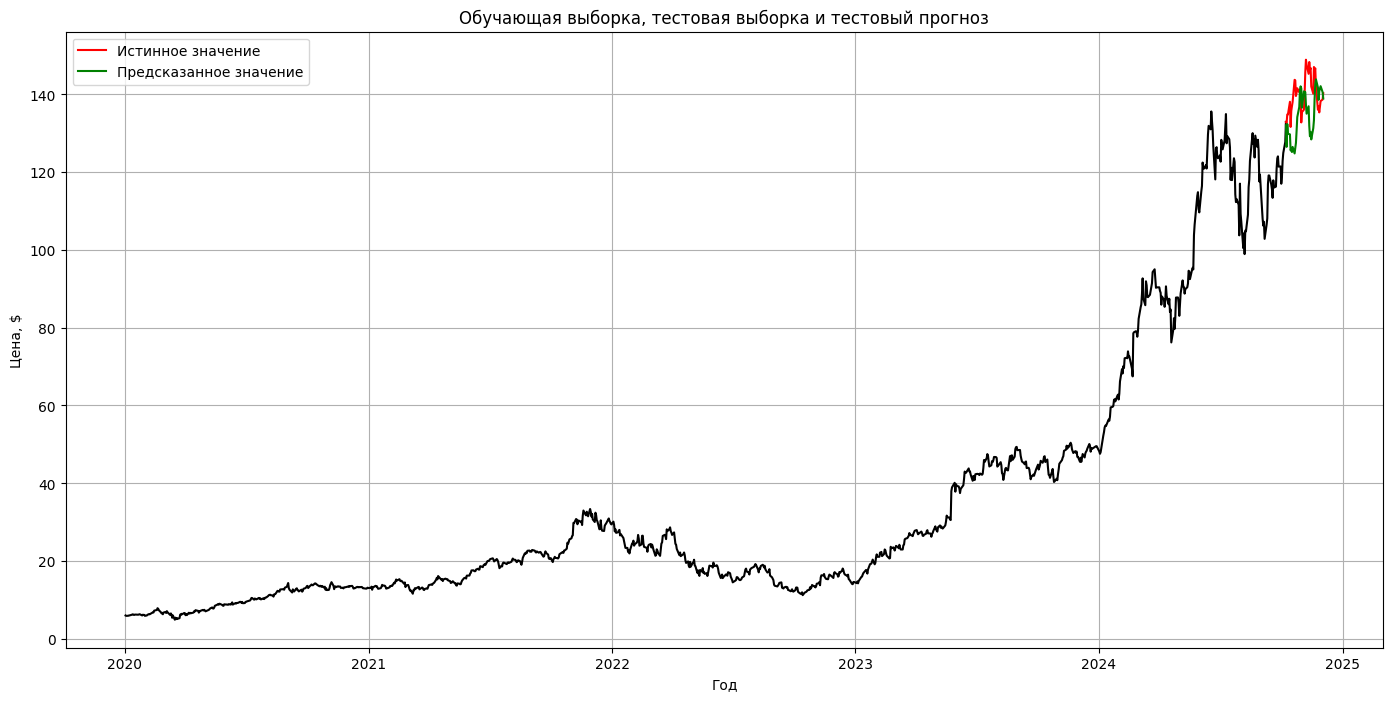

In [ ]:
start = len(train)
end = len(train) + len(test) - 1

predictions = result.predict(start, end)
predictions.index = test.index

plt.figure(figsize = (17,8))
plt.plot(train, color = 'black')
plt.plot(test, color = 'red', label='Истинное значение')
plt.plot(predictions, color = 'green', label='Предсказанное значение')

plt.title('Обучающая выборка, тестовая выборка и тестовый прогноз')
plt.ylabel('Цена, $')
plt.xlabel('Год')
plt.legend()
plt.grid()

plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print('MSE: ', mean_squared_error(test, predictions))
print('RMSE: ', np.sqrt(mean_squared_error(test, predictions)))
print('MAE: ', mean_absolute_error(test, predictions))
print('R²: ', r2_score(test, predictions))

MSE:  86.22095865502975
RMSE:  9.285524145412026
MAE:  7.6520289642700465
R²:  -2.7399662597458767


In [ ]:
start = len(data)
end = (len(data) - 1) + 3 * 30

forecast = result.predict(start, end)

# Создание нового индекса дат для прогнозов
last_date = test.index[-1]
future_dates = pd.date_range(start=last_date, periods=len(forecast), freq='D')

# Присвоение нового индекса прогнозам
forecast.index = future_dates

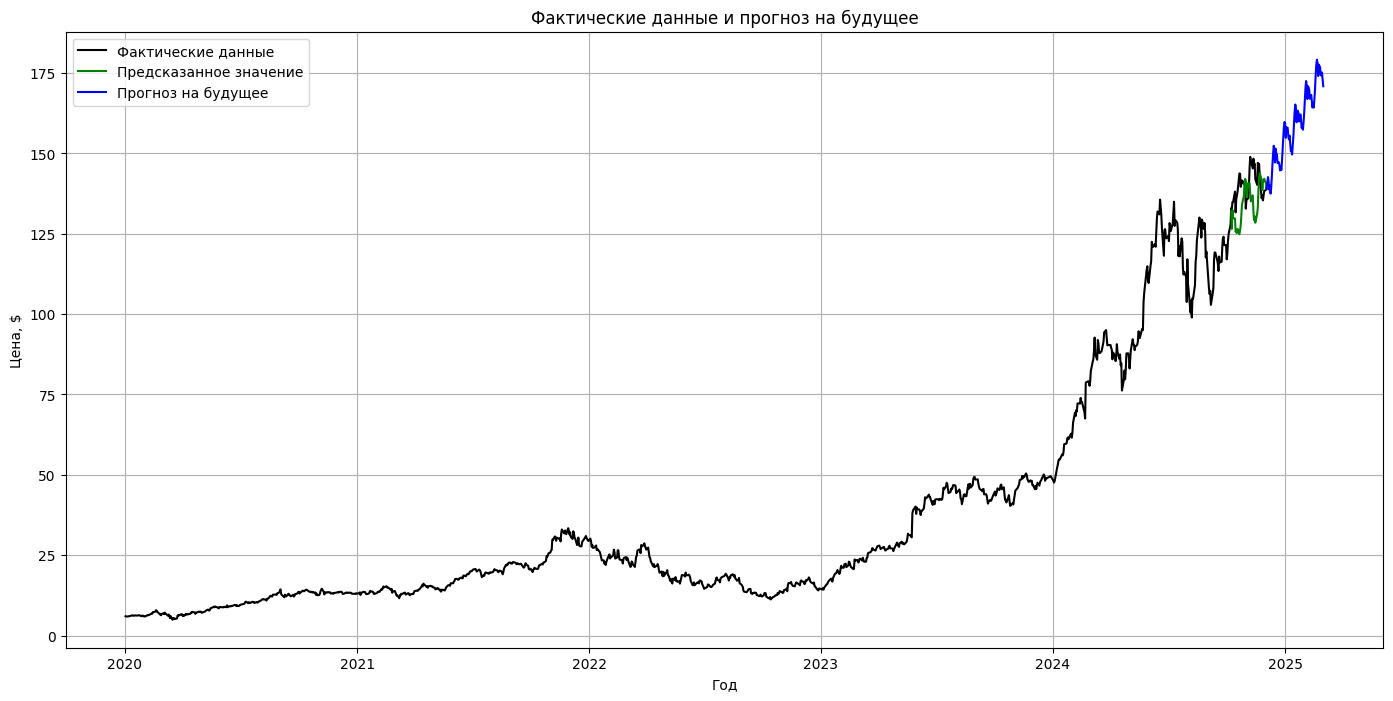

In [ ]:
plt.figure(figsize = (17,8))
plt.plot(data, color = 'black', label='Фактические данные')
plt.plot(predictions, color = 'green', label='Предсказанное значение')
plt.plot(forecast, color = 'blue', label='Прогноз на будущее')

plt.title('Фактические данные и прогноз на будущее')
plt.ylabel('Цена, $')
plt.xlabel('Год')
plt.legend()
plt.grid()

plt.show()

## Глубокое обучение

### SimpleRNN


In [ ]:
# Преобразование данных в массив numpy
df = data.values.astype('float32')
df = df.reshape(-1, 1)

# Нормализация данных
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(df)

train_size = int(len(dataset) * 0.70)
train, test = dataset[0:train_size, :], dataset[train_size:, :]

# Преобразование данных в последовательности (X, Y)
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        # Формирование последовательности входных данных длиной look_back
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        # Целевое значение - следующий элемент после последовательности
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 10  # Количество предыдущих временных шагов для использования в качестве входных данных
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# Изменение формы данных для моделей RNN
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))  # Преобразование в форму [samples, timesteps, features] для RNN-моделей
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))  # Аналогично для тестовых данных

print(X_train.shape, Y_train.shape)
print(X_train[0], Y_train[0])

(857, 10, 1) (857,)
[[0.00755539]
 [0.00688859]
 [0.0070605 ]
 [0.00755887]
 [0.00763701]
 [0.00809544]
 [0.00832118]
 [0.00965132]
 [0.00883518]
 [0.00853824]] 0.009121694


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

model_rnn = Sequential()
model_rnn.add(SimpleRNN(50, input_shape=(look_back, 1)))
model_rnn.add(Dense(1))
model_rnn.compile(loss='mean_squared_error', optimizer='adam')

history = model_rnn.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test), verbose=2)

train_predict_rnn = model_rnn.predict(X_train)
test_predict_rnn = model_rnn.predict(X_test)

Epoch 1/100
27/27 - 2s - 63ms/step - loss: 0.0033 - val_loss: 0.0364
Epoch 2/100
27/27 - 0s - 5ms/step - loss: 2.1112e-04 - val_loss: 0.0239
Epoch 3/100
27/27 - 0s - 5ms/step - loss: 1.2834e-04 - val_loss: 0.0222
Epoch 4/100
27/27 - 0s - 5ms/step - loss: 1.1600e-04 - val_loss: 0.0225
Epoch 5/100
27/27 - 0s - 5ms/step - loss: 1.0336e-04 - val_loss: 0.0199
Epoch 6/100
27/27 - 0s - 5ms/step - loss: 9.3741e-05 - val_loss: 0.0176
Epoch 7/100
27/27 - 0s - 5ms/step - loss: 8.5287e-05 - val_loss: 0.0154
Epoch 8/100
27/27 - 0s - 5ms/step - loss: 7.7955e-05 - val_loss: 0.0153
Epoch 9/100
27/27 - 0s - 5ms/step - loss: 6.9196e-05 - val_loss: 0.0158
Epoch 10/100
27/27 - 0s - 5ms/step - loss: 6.6880e-05 - val_loss: 0.0124
Epoch 11/100
27/27 - 0s - 7ms/step - loss: 6.0809e-05 - val_loss: 0.0112
Epoch 12/100
27/27 - 0s - 8ms/step - loss: 6.0255e-05 - val_loss: 0.0081
Epoch 13/100
27/27 - 0s - 9ms/step - loss: 5.6291e-05 - val_loss: 0.0105
Epoch 14/100
27/27 - 0s - 10ms/step - loss: 5.3155e-05 - val_lo

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Возвращение данных в исходный масштаб
train_predict_rnn = scaler.inverse_transform(train_predict_rnn)
Y_train_actual = scaler.inverse_transform([Y_train])
test_predict_rnn = scaler.inverse_transform(test_predict_rnn)
Y_test_actual = scaler.inverse_transform([Y_test])


train_score_sqrt = np.sqrt(mean_squared_error(Y_train_actual[0], train_predict_rnn[:,0]))
train_score = mean_squared_error(Y_train_actual[0], train_predict_rnn[:,0])
mae = mean_absolute_error(Y_train_actual[0], train_predict_rnn[:,0])
r2 = r2_score(Y_train_actual[0], train_predict_rnn[:,0])
print(f'MSE на обучающем наборе: {train_score:.2f}')
print(f'RMSE на обучающем наборе: {train_score_sqrt:.2f}')
print(f'MAE на обучающем наборе: {mae:.2f}')
print(f'R² на обучающем наборе: {r2:.2f}', end = '\n\n')

test_score_sqrt = np.sqrt(mean_squared_error(Y_test_actual[0], test_predict_rnn[:,0]))
test_score = mean_squared_error(Y_test_actual[0], test_predict_rnn[:,0])
mae_test = mean_absolute_error(Y_test_actual[0], test_predict_rnn[:,0])
r2_test = r2_score(Y_test_actual[0], test_predict_rnn[:,0])
print(f'MSE на тестовом наборе: {test_score:.2f}')
print(f'RMSE на тестовом наборе: {test_score_sqrt:.2f}')
print(f'MAE на тестовом наборе: {mae_test:.2f}')
print(f'R² на тестовом наборе: {r2_test:.2f}')

MSE на обучающем наборе: 0.48
RMSE на обучающем наборе: 0.69
MAE на обучающем наборе: 0.48
R² на обучающем наборе: 0.99

MSE на тестовом наборе: 23.40
RMSE на тестовом наборе: 4.84
MAE на тестовом наборе: 3.37
R² на тестовом наборе: 0.98


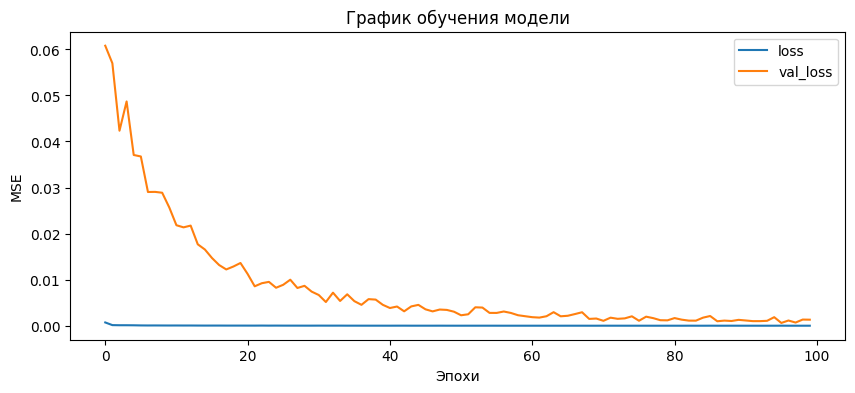

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('График обучения модели')
plt.xlabel('Эпохи')
plt.ylabel('MSE')
plt.legend()
plt.show()

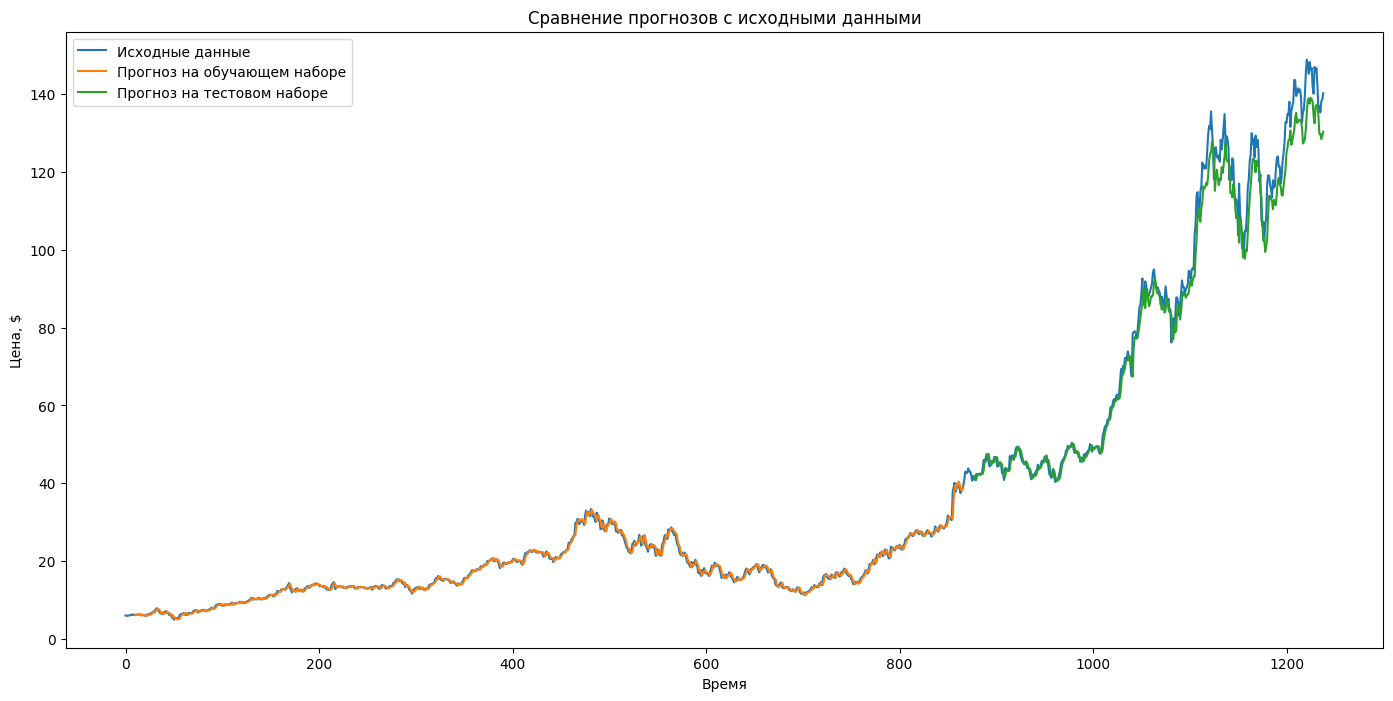

In [ ]:
# Создание плейсхолдера для предсказаний, чтобы сохранить формат временного ряда
train_predict_plot = np.empty_like(dataset)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back:len(train_predict_rnn)+look_back, :] = train_predict_rnn

test_predict_plot = np.empty_like(dataset)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict_rnn)+(look_back*2):len(dataset), :] = test_predict_rnn

# Построение графика результатов
plt.figure(figsize=(17,8))
plt.plot(scaler.inverse_transform(dataset), label='Исходные данные')  # Исходный временной ряд
plt.plot(train_predict_plot, label='Прогноз на обучающем наборе')  # Прогноз на обучающем наборе
plt.plot(test_predict_plot, label='Прогноз на тестовом наборе')  # Прогноз на тестовом наборе
plt.title('Сравнение прогнозов с исходными данными')
plt.xlabel('Время')
plt.ylabel('Цена, $')
plt.legend()
plt.show()

### LSTM

In [ ]:
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Создание модели
model_rnn = Sequential()
model_rnn.add(LSTM(100, return_sequences=True, input_shape=(look_back, 1)))
model_rnn.add(Dropout(0.2))
model_rnn.add(LSTM(50))
model_rnn.add(Dropout(0.2))
model_rnn.add(Dense(1))
model_rnn.compile(loss='mean_squared_error', optimizer='adam')

# Обучение модели
history = model_rnn.fit(X_train, Y_train, epochs=200, batch_size=32, validation_data=(X_test, Y_test), verbose=2)

# Прогнозирование
train_predict_rnn = model_rnn.predict(X_train)
test_predict_rnn = model_rnn.predict(X_test)

Epoch 1/200
27/27 - 4s - 145ms/step - loss: 0.0017 - val_loss: 0.0171
Epoch 2/200
27/27 - 1s - 34ms/step - loss: 3.0922e-04 - val_loss: 0.0021
Epoch 3/200
27/27 - 1s - 31ms/step - loss: 2.2009e-04 - val_loss: 0.0018
Epoch 4/200
27/27 - 1s - 23ms/step - loss: 1.7190e-04 - val_loss: 0.0015
Epoch 5/200
27/27 - 1s - 23ms/step - loss: 1.7308e-04 - val_loss: 0.0017
Epoch 6/200
27/27 - 1s - 40ms/step - loss: 1.5037e-04 - val_loss: 0.0017
Epoch 7/200
27/27 - 1s - 21ms/step - loss: 1.6085e-04 - val_loss: 0.0016
Epoch 8/200
27/27 - 1s - 23ms/step - loss: 1.4370e-04 - val_loss: 0.0015
Epoch 9/200
27/27 - 1s - 23ms/step - loss: 1.4394e-04 - val_loss: 0.0015
Epoch 10/200
27/27 - 0s - 14ms/step - loss: 1.2706e-04 - val_loss: 0.0015
Epoch 11/200
27/27 - 0s - 15ms/step - loss: 1.4958e-04 - val_loss: 0.0029
Epoch 12/200
27/27 - 1s - 23ms/step - loss: 1.3334e-04 - val_loss: 0.0014
Epoch 13/200
27/27 - 1s - 23ms/step - loss: 1.3816e-04 - val_loss: 0.0013
Epoch 14/200
27/27 - 1s - 22ms/step - loss: 1.3162

In [ ]:
train_predict_rnn = scaler.inverse_transform(train_predict_rnn)
Y_train_actual = scaler.inverse_transform([Y_train])
test_predict_rnn = scaler.inverse_transform(test_predict_rnn)
Y_test_actual = scaler.inverse_transform([Y_test])


train_score_sqrt = np.sqrt(mean_squared_error(Y_train_actual[0], train_predict_rnn[:,0]))
train_score = mean_squared_error(Y_train_actual[0], train_predict_rnn[:,0])
mae = mean_absolute_error(Y_train_actual[0], train_predict_rnn[:,0])
r2 = r2_score(Y_train_actual[0], train_predict_rnn[:,0])
print(f'MSE на обучающем наборе: {train_score:.2f}')
print(f'RMSE на обучающем наборе: {train_score_sqrt:.2f}')
print(f'MAE на обучающем наборе: {mae:.2f}')
print(f'R² на обучающем наборе: {r2:.2f}', end = '\n\n')

test_score_sqrt = np.sqrt(mean_squared_error(Y_test_actual[0], test_predict_rnn[:,0]))
test_score = mean_squared_error(Y_test_actual[0], test_predict_rnn[:,0])
mae_test = mean_absolute_error(Y_test_actual[0], test_predict_rnn[:,0])
r2_test = r2_score(Y_test_actual[0], test_predict_rnn[:,0])
print(f'MSE на тестовом наборе: {test_score:.2f}')
print(f'RMSE на тестовом наборе: {test_score_sqrt:.2f}')
print(f'MAE на тестовом наборе: {mae_test:.2f}')
print(f'R² на тестовом наборе: {r2_test:.2f}')

MSE на обучающем наборе: 0.61
RMSE на обучающем наборе: 0.78
MAE на обучающем наборе: 0.57
R² на обучающем наборе: 0.99

MSE на тестовом наборе: 25.62
RMSE на тестовом наборе: 5.06
MAE на тестовом наборе: 3.91
R² на тестовом наборе: 0.98


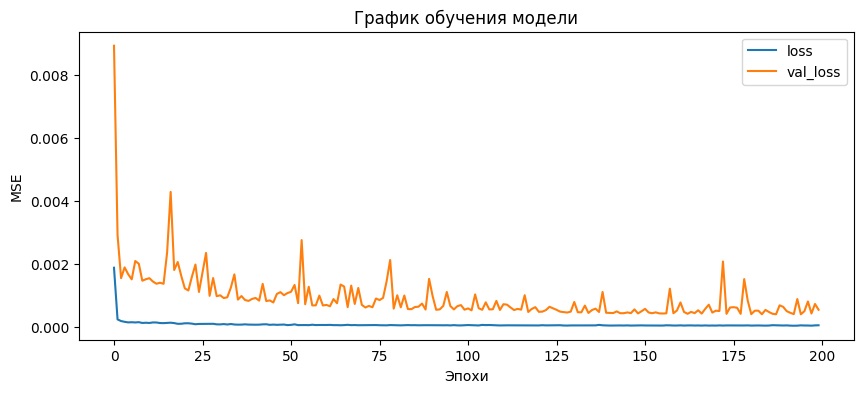

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('График обучения модели')
plt.xlabel('Эпохи')
plt.ylabel('MSE')
plt.legend()
plt.show()

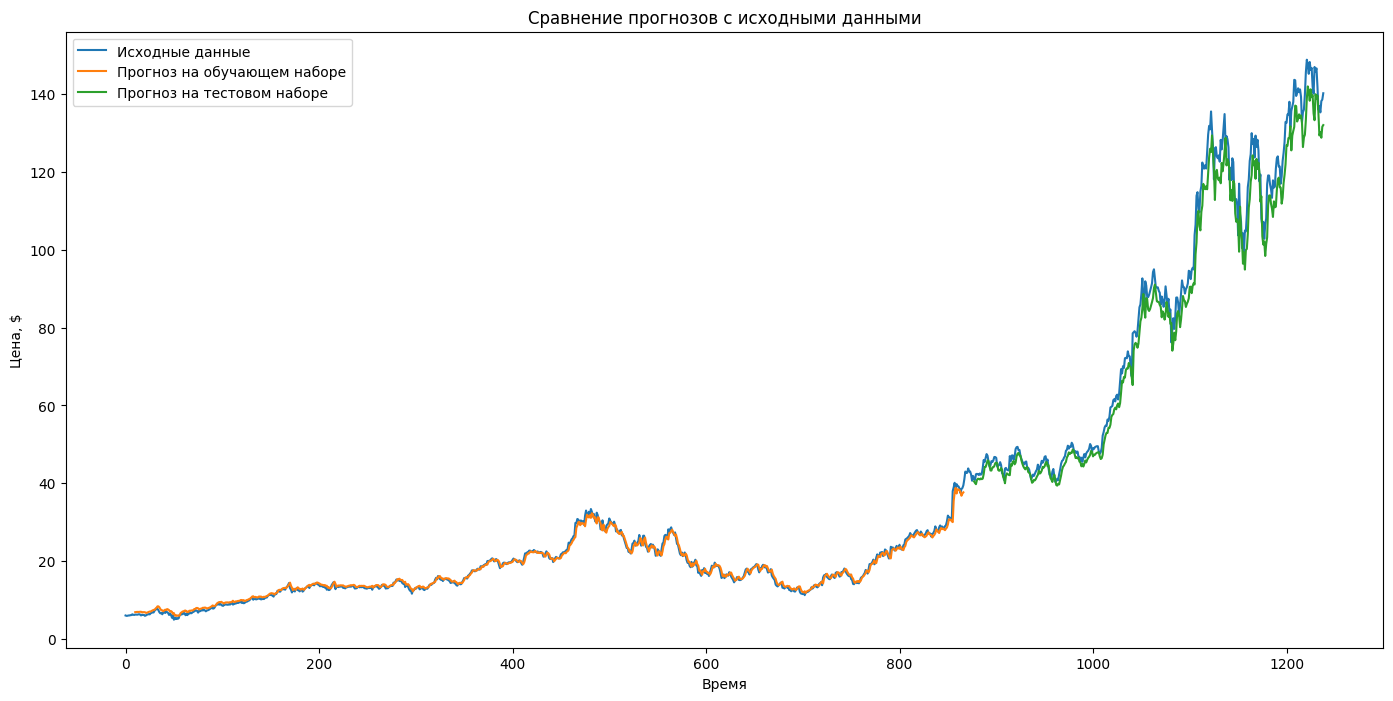

In [ ]:
# Создание плейсхолдера для предсказаний, чтобы сохранить формат временного ряда
train_predict_plot = np.empty_like(dataset)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back:len(train_predict_rnn)+look_back, :] = train_predict_rnn

test_predict_plot = np.empty_like(dataset)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict_rnn)+(look_back*2):len(dataset), :] = test_predict_rnn

# Построение графика результатов
plt.figure(figsize=(17,8))
plt.plot(scaler.inverse_transform(dataset), label='Исходные данные')  # Исходный временной ряд
plt.plot(train_predict_plot, label='Прогноз на обучающем наборе')  # Прогноз на обучающем наборе
plt.plot(test_predict_plot, label='Прогноз на тестовом наборе')  # Прогноз на тестовом наборе
plt.title('Сравнение прогнозов с исходными данными')
plt.xlabel('Время')
plt.ylabel('Цена, $')
plt.legend()
plt.show()

### GRU

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

model_gru = Sequential()
model_gru.add(GRU(100, return_sequences=True, input_shape=(look_back, 1)))
model_gru.add(Dropout(0.2))
model_gru.add(GRU(50, return_sequences=True))
model_gru.add(Dropout(0.2))
model_gru.add(GRU(25))
model_gru.add(Dense(1))
model_gru.compile(loss='mean_squared_error', optimizer='adam')

# Обучение модели
history = model_gru.fit(X_train, Y_train, epochs=200, batch_size=32, validation_data=(X_test, Y_test), verbose=2)

# Прогнозирование
train_predict_gru = model_gru.predict(X_train)
test_predict_gru = model_gru.predict(X_test)

Epoch 1/200
27/27 - 7s - 257ms/step - loss: 0.0017 - val_loss: 0.0156
Epoch 2/200
27/27 - 1s - 49ms/step - loss: 1.7566e-04 - val_loss: 0.0021
Epoch 3/200
27/27 - 1s - 21ms/step - loss: 1.0340e-04 - val_loss: 0.0016
Epoch 4/200
27/27 - 1s - 22ms/step - loss: 9.1361e-05 - val_loss: 0.0014
Epoch 5/200
27/27 - 1s - 23ms/step - loss: 9.0903e-05 - val_loss: 0.0018
Epoch 6/200
27/27 - 1s - 21ms/step - loss: 7.4704e-05 - val_loss: 0.0012
Epoch 7/200
27/27 - 1s - 21ms/step - loss: 7.4293e-05 - val_loss: 0.0030
Epoch 8/200
27/27 - 1s - 21ms/step - loss: 8.0151e-05 - val_loss: 0.0013
Epoch 9/200
27/27 - 1s - 21ms/step - loss: 9.5664e-05 - val_loss: 0.0014
Epoch 10/200
27/27 - 1s - 21ms/step - loss: 7.6001e-05 - val_loss: 9.5853e-04
Epoch 11/200
27/27 - 1s - 21ms/step - loss: 6.8321e-05 - val_loss: 0.0020
Epoch 12/200
27/27 - 1s - 22ms/step - loss: 7.3776e-05 - val_loss: 0.0017
Epoch 13/200
27/27 - 1s - 38ms/step - loss: 7.3595e-05 - val_loss: 0.0020
Epoch 14/200
27/27 - 1s - 34ms/step - loss: 6.

In [ ]:
train_predict_gru = scaler.inverse_transform(train_predict_gru)
Y_train_actual = scaler.inverse_transform([Y_train])
test_predict_gru = scaler.inverse_transform(test_predict_gru)
Y_test_actual = scaler.inverse_transform([Y_test])

train_score_sqrt = np.sqrt(mean_squared_error(Y_train_actual[0], train_predict_gru[:,0]))
train_score = mean_squared_error(Y_train_actual[0], train_predict_gru[:,0])
mae = mean_absolute_error(Y_train_actual[0], train_predict_gru[:,0])
r2 = r2_score(Y_train_actual[0], train_predict_gru[:,0])
print(f'MSE на обучающем наборе: {train_score:.2f}')
print(f'RMSE на обучающем наборе: {train_score_sqrt:.2f}')
print(f'MAE на обучающем наборе: {mae:.2f}')
print(f'R² на обучающем наборе: {r2:.2f}', end = '\n\n')

test_score_sqrt = np.sqrt(mean_squared_error(Y_test_actual[0], test_predict_gru[:,0]))
test_score = np.sqrt(mean_squared_error(Y_test_actual[0], test_predict_gru[:,0]))
mae_test = mean_absolute_error(Y_test_actual[0], test_predict_gru[:,0])
r2_test = r2_score(Y_test_actual[0], test_predict_gru[:,0])
print(f'MSE на тестовом наборе: {test_score:.2f}')
print(f'RMSE на тестовом наборе: {test_score_sqrt:.2f}')
print(f'MAE на тестовом наборе: {mae_test:.2f}')
print(f'R² на тестовом наборе: {r2_test:.2f}')

MSE на обучающем наборе: 0.46
RMSE на обучающем наборе: 0.68
MAE на обучающем наборе: 0.46
R² на обучающем наборе: 0.99

MSE на тестовом наборе: 3.06
RMSE на тестовом наборе: 3.06
MAE на тестовом наборе: 2.13
R² на тестовом наборе: 0.99


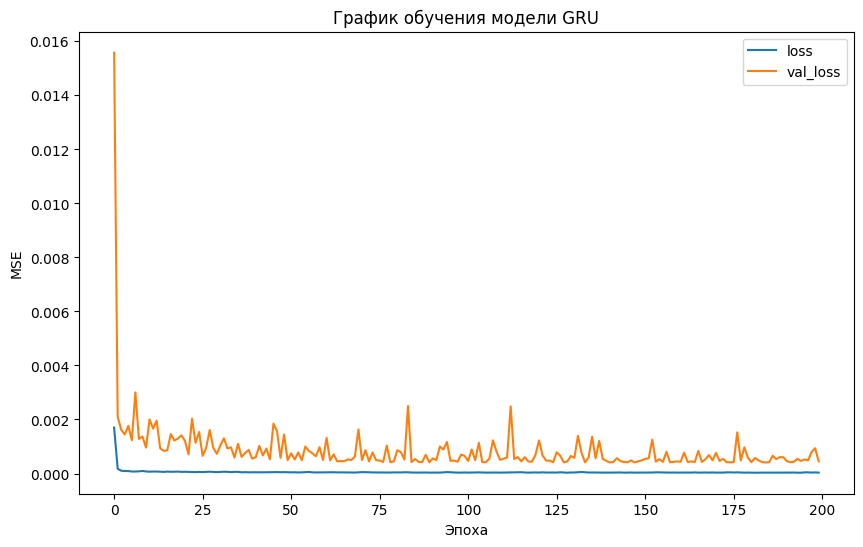

In [ ]:
# Построение графика ошибок во время обучения
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('График обучения модели GRU')
plt.ylabel('MSE')
plt.xlabel('Эпоха')
plt.legend()
plt.show()

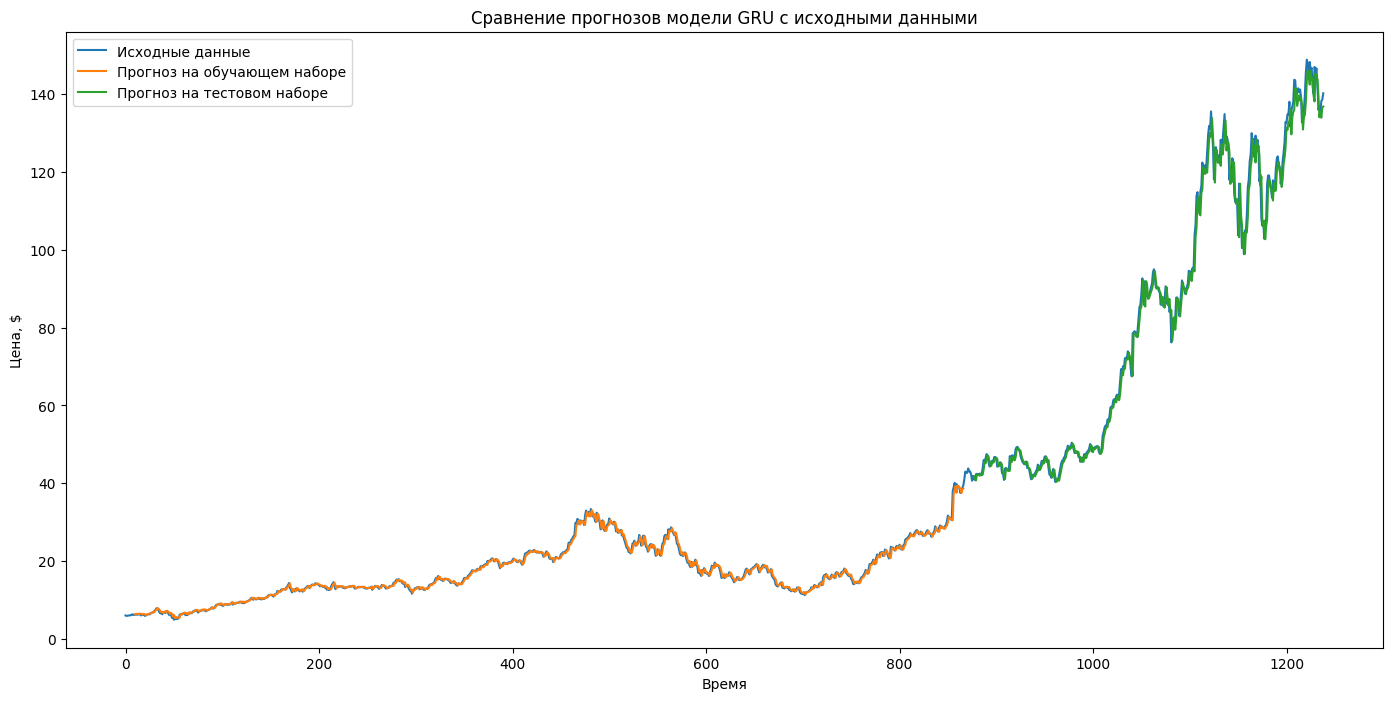

In [ ]:
# Создание плейсхолдеров для предсказаний
train_predict_plot = np.empty_like(dataset)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back:len(train_predict_gru)+look_back, :] = train_predict_gru

test_predict_plot = np.empty_like(dataset)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict_gru)+(look_back*2):len(dataset), :] = test_predict_gru

# Построение графика исходных данных и предсказаний
plt.figure(figsize=(17, 8))
plt.plot(scaler.inverse_transform(dataset), label='Исходные данные')
plt.plot(train_predict_plot, label='Прогноз на обучающем наборе')
plt.plot(test_predict_plot, label='Прогноз на тестовом наборе')
plt.title('Сравнение прогнозов модели GRU с исходными данными')
plt.xlabel('Время')
plt.ylabel('Цена, $')
plt.legend()
plt.show()

### N-BEATS

In [ ]:
!pip install nbeats-keras

INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 45.8 MB/s e

In [ ]:
from tensorflow.keras.optimizers import Adam
from nbeats_keras.model import NBeatsNet

df = data.values.astype('float32')
df = df.reshape(-1, 1)

# Нормализация данных
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(df)

# Разбиение на обучающую и тестовую выборки
train_size = int(len(dataset) * 0.7)
train, test = dataset[0:train_size, :], dataset[train_size:, :]

# Преобразование данных в последовательности (X, Y)
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 10
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# Нет необходимости изменять форму данных для модели N-BEATS
# X_train имеет форму (samples, look_back), что соответствует требованиям модели

# Установка параметров модели
input_dim = 1  # Количество признаков (у нас один признак - количество пассажиров)
backcast_length = look_back  # Длина истории
forecast_length = 1  # Длина прогноза
num_epochs = 200

# Создание модели
model_nbeats = NBeatsNet(
    input_dim=input_dim,
    backcast_length=backcast_length,
    forecast_length=forecast_length,
    stack_types=(NBeatsNet.GENERIC_BLOCK, NBeatsNet.GENERIC_BLOCK),
    nb_blocks_per_stack=2,
    thetas_dim=(4, 4),
    share_weights_in_stack=True,
    hidden_layer_units=64
)

optimizer = Adam(learning_rate=0.001)

# Компиляция модели
model_nbeats.compile(loss='mean_squared_error', optimizer=optimizer)


# Обучение модели
model_nbeats.fit(
    X_train,
    Y_train,
    validation_data=(X_test, Y_test),
    epochs=num_epochs,
    batch_size=1,
    verbose=2
)

# Прогнозирование
train_predict_nbeats = model_nbeats.predict(X_train)
test_predict_nbeats = model_nbeats.predict(X_test)

Epoch 1/200
857/857 - 5s - loss: 2.4255e-04 - val_loss: 0.0038 - 5s/epoch - 6ms/step
Epoch 2/200
857/857 - 3s - loss: 1.1289e-04 - val_loss: 0.0104 - 3s/epoch - 4ms/step
Epoch 3/200
857/857 - 6s - loss: 1.0406e-04 - val_loss: 0.0080 - 6s/epoch - 7ms/step
Epoch 4/200
857/857 - 5s - loss: 9.2237e-05 - val_loss: 0.0032 - 5s/epoch - 5ms/step
Epoch 5/200
857/857 - 2s - loss: 7.6071e-05 - val_loss: 7.7469e-04 - 2s/epoch - 3ms/step
Epoch 6/200
857/857 - 2s - loss: 6.6999e-05 - val_loss: 0.0011 - 2s/epoch - 3ms/step
Epoch 7/200
857/857 - 4s - loss: 7.4670e-05 - val_loss: 7.1696e-04 - 4s/epoch - 5ms/step
Epoch 8/200
857/857 - 5s - loss: 7.6663e-05 - val_loss: 0.0015 - 5s/epoch - 6ms/step
Epoch 9/200
857/857 - 6s - loss: 6.8208e-05 - val_loss: 8.5534e-04 - 6s/epoch - 7ms/step
Epoch 10/200
857/857 - 3s - loss: 6.2165e-05 - val_loss: 7.5780e-04 - 3s/epoch - 4ms/step
Epoch 11/200
857/857 - 3s - loss: 6.7327e-05 - val_loss: 5.6646e-04 - 3s/epoch - 3ms/step
Epoch 12/200
857/857 - 3s - loss: 5.4106e-0

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

train_predict_nbeats_reshaped = train_predict_nbeats.reshape(-1, 1)
train_predict_nbeats_inversed = scaler.inverse_transform(train_predict_nbeats_reshaped)
Y_train_actual = scaler.inverse_transform(Y_train.reshape(-1, 1))

test_predict_nbeats_reshaped = test_predict_nbeats.reshape(-1, 1)
test_predict_nbeats_inversed = scaler.inverse_transform(test_predict_nbeats_reshaped)
Y_test_actual = scaler.inverse_transform(Y_test.reshape(-1, 1))

train_mse = mean_squared_error(Y_train_actual, train_predict_nbeats_inversed)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(Y_train_actual, train_predict_nbeats_inversed)
r2 = r2_score(Y_train_actual, train_predict_nbeats_inversed)

print('Метрики на обучающей выборке:')
print(f'MSE: {train_mse:.2f}')
print(f'RMSE: {train_rmse:.2f}')
print(f'MAE: {train_mae:.2f}')
print(f'R²: {r2:.2f}', end = '\n\n')

test_mse = mean_squared_error(Y_test_actual, test_predict_nbeats_inversed)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(Y_test_actual, test_predict_nbeats_inversed)
r2_test = r2_score(Y_test_actual, test_predict_nbeats_inversed)

print('Метрики на тестовой выборке:')
print(f'MSE: {test_mse:.2f}')
print(f'RMSE: {test_rmse:.2f}')
print(f'MAE: {test_mae:.2f}')
print(f'R²: {r2_test:.2f}')

Метрики на обучающей выборке:
MSE: 0.82
RMSE: 0.91
MAE: 0.72
R²: 0.98

Метрики на тестовой выборке:
MSE: 80.73
RMSE: 8.98
MAE: 6.95
R²: 0.94


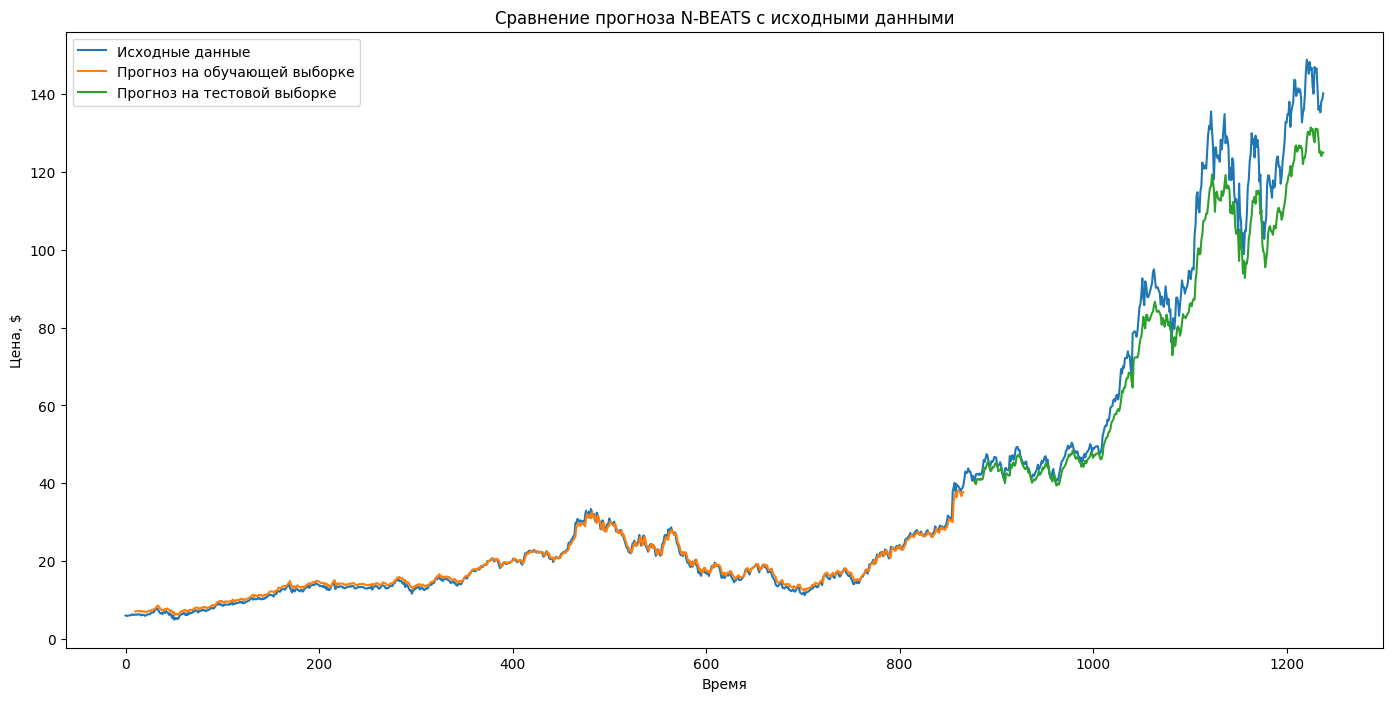

In [ ]:
# Создание плейсхолдеров для прогнозов
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict_nbeats_inversed)+look_back, 0] = train_predict_nbeats_inversed[:, 0]

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict_nbeats_inversed)+(look_back*2):len(dataset), 0] = test_predict_nbeats_inversed[:, 0]

plt.figure(figsize=(17,8))
plt.plot(scaler.inverse_transform(dataset), label='Исходные данные')
plt.plot(trainPredictPlot, label='Прогноз на обучающей выборке')
plt.plot(testPredictPlot, label='Прогноз на тестовой выборке')
plt.xlabel('Время')
plt.ylabel('Цена, $')
plt.title('Сравнение прогноза N-BEATS с исходными данными')
plt.legend()
plt.show()

### NHITS (NIXTLA - NeuralForecast)

In [ ]:
!pip install neuralforecast

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.2/259.2 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.6/275.6 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319.7 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.1 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
    

In [ ]:
Y_train_df

,ds,y
0,2020-01-02,5.997750
1,2020-01-03,5.901750
2,2020-01-06,5.926500
3,2020-01-07,5.998250
4,2020-01-08,6.009500
...,...,...
1195,2024-10-02,118.849998
1196,2024-10-03,122.849998
1197,2024-10-04,124.919998
1198,2024-10-07,127.720001


In [ ]:
from neuralforecast import NeuralForecast
from neuralforecast.models import NHITS

train = data[:'2024-10-08']
test = data['2024-10-08':]

# Split data and declare panel dataset
Y_train_df = data[:'2024-10-08']
Y_test_df = data['2024-10-08':]

if isinstance(Y_train_df, pd.Series):
    Y_train_df = Y_train_df.to_frame()

Y_train_df.reset_index(inplace=True)
Y_train_df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
Y_train_df['unique_id'] = 'NVIDIA'

if isinstance(Y_test_df, pd.Series):
    Y_test_df = Y_test_df.to_frame()

Y_test_df.reset_index(inplace=True)
Y_test_df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
Y_test_df['unique_id'] = 'NVIDIA'

# Fit and predict with NBEATS and NHITS models
horizon = len(Y_test_df)
model = NHITS(input_size=2 * horizon, h=horizon, max_steps=10)
nf = NeuralForecast(models=[model], freq='D')
nf.fit(df=Y_train_df)

Y_hat_df = nf.predict().reset_index()

INFO:lightning_fabric.utilities.seed:Seed set to 1
/usr/local/lib/python3.10/dist-packages/neuralforecast/common/_base_model.py:359: UserWarning: val_check_steps is greater than max_steps, setting val_check_steps to max_steps.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 2.6 M  | train
-------------------------------------------------------
2.6 M     Trainable params
0         Non-trainable params
2.6 M     Total params
10.426    Total estimated

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=10` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:214: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


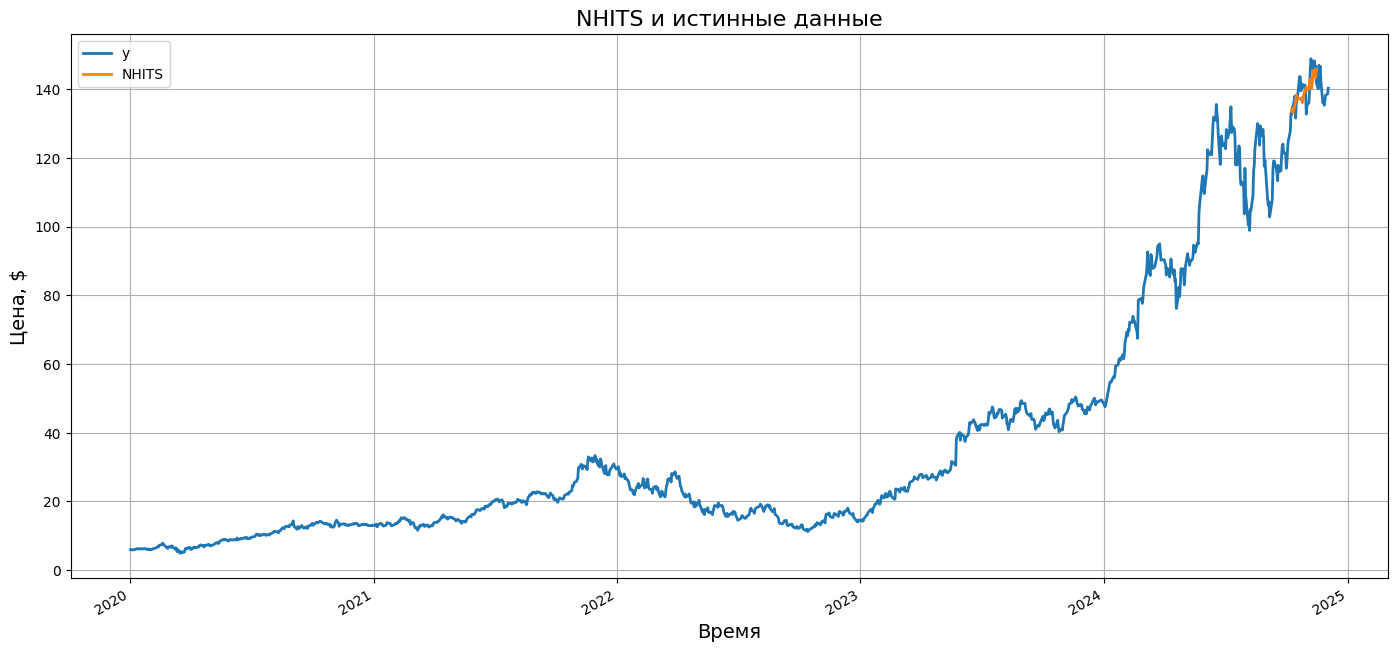

In [ ]:
# Plot predictions
fig, ax = plt.subplots(1, 1, figsize = (17, 8))
Y_hat_df = Y_test_df.merge(Y_hat_df, how='left', on=['unique_id', 'ds'])
plot_df = pd.concat([Y_train_df, Y_hat_df]).set_index('ds')

plot_df[['y', 'NHITS']].plot(ax=ax, linewidth=2)

ax.set_title('NHITS и истинные данные', fontsize=16)
ax.set_ylabel('Цена, $', fontsize=14)
ax.set_xlabel('Время', fontsize=14)
ax.legend(prop={'size': 10})
ax.grid()

In [ ]:
Y_hat_df = Y_hat_df[Y_hat_df['ds'].isin(Y_test_df['ds'])]

# Убедитесь, что индексы совпадают
Y_hat_df.set_index('ds', inplace=True)
Y_test_df.set_index('ds', inplace=True)

# Убедитесь, что количество строк совпадает
Y_hat_df = Y_hat_df.reindex(Y_test_df.index)

# Удалите строки с пропусками
Y_hat_df.dropna(inplace=True)
Y_test_df = Y_test_df.loc[Y_hat_df.index]

test_mse = mean_squared_error(Y_test_df['y'], Y_hat_df['NHITS'])
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(Y_test_df['y'], Y_hat_df['NHITS'])
r2_test = r2_score(Y_test_df['y'], Y_hat_df['NHITS'])

print('Метрики на тестовой выборке:')
print(f'MSE: {test_mse:.2f}')
print(f'RMSE: {test_rmse:.2f}')
print(f'MAE: {test_mae:.2f}')
print(f'R²: {r2_test:.2f}')

Метрики на тестовой выборке:
MSE: 15.37
RMSE: 3.92
MAE: 3.23
R²: 0.37


## Сравнение моделей по метрикам (MSE, RMSE, MAE, R²)

### Формирование словаря со значениями

In [ ]:
metrics = {
    'SARIMAX': {
        'MSE': 86.22,
        'RMSE': 9.28,
        'MAE': 7.65,
        'R²': -2.74
    },
    'SimpleRNN': {
        'MSE': 23.40,
        'RMSE': 4.84,
        'MAE': 3.37,
        'R²': 0.98
    },
    'LSTM': {
        'MSE': 25.62,
        'RMSE': 5.06,
        'MAE': 3.91,
        'R²': 0.98
    },
    'GRU': {
        'MSE': 3.06,
        'RMSE': 3.06,
        'MAE': 2.13,
        'R²': 0.99
    },
    'NBEATS': {
        'MSE': 80.73,
        'RMSE': 8.98,
        'MAE': 6.95,
        'R²': 0.94
    },
    'NHITS': {
        'MSE': 15.37,
        'RMSE': 3.92,
        'MAE': 3.23,
        'R²': 0.37
    }
}

### График

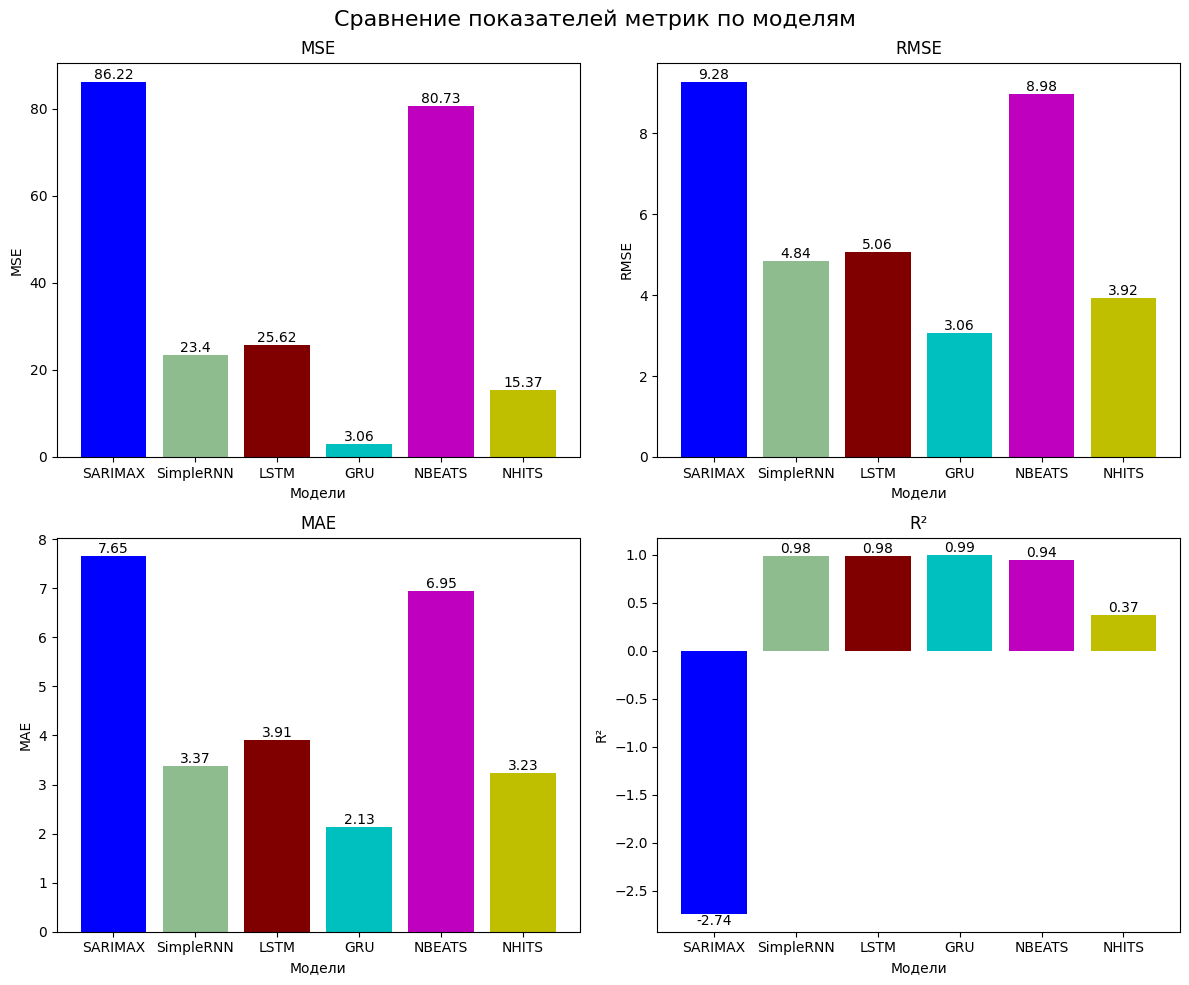

In [ ]:
colors = ['b', 'darkseagreen', 'maroon', 'c', 'm', 'y']

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Сравнение показателей метрик по моделям', fontsize=16)

# MSE
bars = axs[0, 0].bar(metrics.keys(), [metrics[model]['MSE'] for model in metrics], color=colors)
axs[0, 0].set_title('MSE')
axs[0, 0].set_ylabel('MSE')
axs[0, 0].bar_label(bars)

# RMSE
bars = axs[0, 1].bar(metrics.keys(), [metrics[model]['RMSE'] for model in metrics], color=colors)
axs[0, 1].set_title('RMSE')
axs[0, 1].set_ylabel('RMSE')
axs[0, 1].bar_label(bars)

# MAE
bars = axs[1, 0].bar(metrics.keys(), [metrics[model]['MAE'] for model in metrics], color=colors)
axs[1, 0].set_title('MAE')
axs[1, 0].set_ylabel('MAE')
axs[1, 0].bar_label(bars)

# R²
bars = axs[1, 1].bar(metrics.keys(), [metrics[model]['R²'] for model in metrics], color=colors)
axs[1, 1].set_title('R²')
axs[1, 1].set_ylabel('R²')
axs[1, 1].bar_label(bars)

for ax in axs.flat:
    ax.set_xlabel('Модели')

plt.tight_layout()
plt.show()